# Image Processing Lab 04 - 02

This notebook uses **simple, beginner‑friendly code** and only:

- `cv2.imread()` → reading images  
- `cv2.imwrite()` → saving images  
- `matplotlib` → showing images

The tasks follow the lab handout:
1. Image flipping  
2. Intensity transformation  
3. Bit‑plane slicing

## 1) Import libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 2) Read and show an image

Change the path to your image.

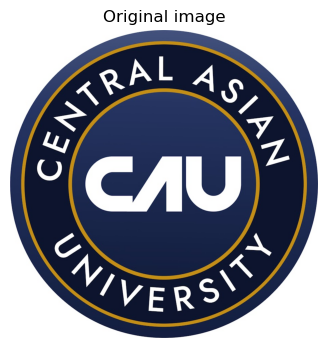

In [ ]:
# Read image (OpenCV reads as BGR)
img = cv2.imread("E:\Courses\logo.jpg")

# Convert BGR → RGB for correct matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show image
plt.figure(figsize=(6,4))
plt.imshow(img_rgb)
plt.title("Original image")
plt.axis("off")
plt.show()

---
# Part A — Image Flipping

## Image Flipping

Image flipping is a basic geometric transformation used in image processing.  
It changes the orientation of an image by reflecting pixel positions across an axis.

### Objective

This section demonstrates three types of image flipping:

- **Horizontal flip** — reflection across the vertical axis (left ↔ right)
- **Vertical flip** — reflection across the horizontal axis (top ↔ bottom)
- **Both directions** — flipping both horizontally and vertically (equivalent to a 180° rotation)

---

### How the code works

1. `cv2.flip()` is used to flip the image:

   - `cv2.flip(img, 1)` → horizontal flip  
   - `cv2.flip(img, 0)` → vertical flip  
   - `cv2.flip(img, -1)` → both horizontal and vertical

2. A figure is created to display results.

3. Each version of the image is shown in a **2×2 subplot layout**:
   - Original image
   - Horizontal flip
   - Vertical flip
   - Both flips

4. `tight_layout()` adjusts spacing for clearer visualization.

---

### Mathematical idea

If the original image is represented as \( I(x,y) \):

- Horizontal flip:
$$
I'(x,y) = I(W-1-x, y)
$$

- Vertical flip:
$$
I'(x,y) = I(x, H-1-y)
$$

where \( W \) and \( H \) are image width and height.

---

### Result

The output figure allows visual comparison between:

- the original image,
- horizontal reflection,
- vertical reflection,
- and combined flipping.


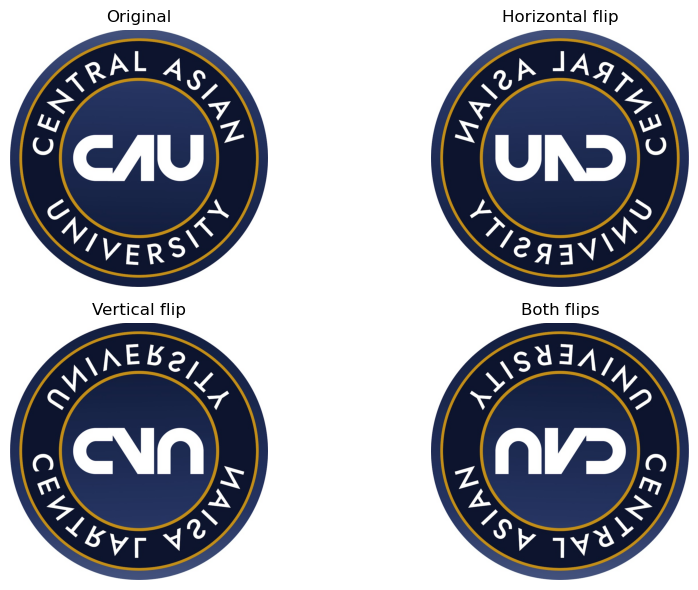

In [ ]:
# Horizontal flip
hflip = cv2.flip(img_rgb, 1)

# Vertical flip
vflip = cv2.flip(img_rgb, 0)

# Both directions
hvflip = cv2.flip(img_rgb, -1)

# Show results
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(hflip)
plt.title("Horizontal flip")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(vflip)
plt.title("Vertical flip")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(hvflip)
plt.title("Both flips")
plt.axis("off")

plt.tight_layout()
plt.show()

## Mirror Effect (Image Reflection)

This section creates a **mirror effect** by placing the original image next to its horizontally flipped version.

### Objective

The goal is to generate a reflected image similar to a mirror by combining:

- the **original image**
- the **horizontally flipped image**

This demonstrates basic image manipulation using array concatenation.

---

### How the code works

1. The image is flipped horizontally (already stored as `hflip`).
2. The original and flipped images are combined side-by-side using `np.concatenate()`:
   - `axis=1` means horizontal concatenation.
3. The resulting mirror image is displayed using `matplotlib`.
4. The output is saved using `cv2.imwrite()`.

---

### Key concept

Images are stored as matrices (arrays).  
By joining two matrices horizontally, we create a larger image:

$$
\text{MirrorImage} = [\text{Original} \;|\; \text{Flipped}]
$$

---

### Explanation of important lines

- `np.concatenate((img_rgb, hflip), axis=1)`  
  Combines both images horizontally.

- `plt.imshow(mirror)`  
  Displays the mirror effect.

- `cv2.imwrite(...)`  
  Saves the result to disk.  
  Since OpenCV uses **BGR** format, conversion from RGB to BGR is required before saving.

---

### Result

The output image shows:

- Left side → Original image  
- Right side → Mirror reflection


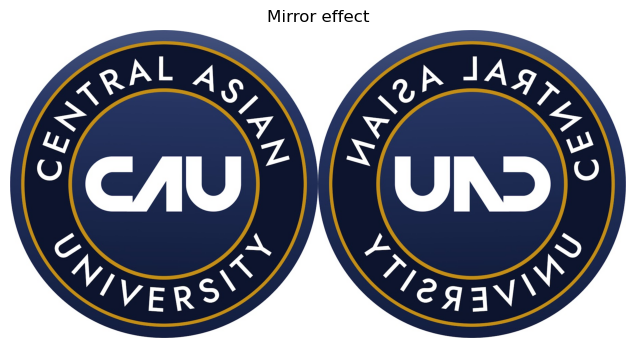

True

In [ ]:
# Mirror effect (original + flipped)
mirror = np.concatenate((img_rgb, hflip), axis=1)

plt.figure(figsize=(8,4))
plt.imshow(mirror)
plt.title("Mirror effect")
plt.axis("off")
plt.show()

# Save result
cv2.imwrite("mirror_output.jpg", cv2.cvtColor(mirror, cv2.COLOR_RGB2BGR))

---
# Part B — Intensity Transformation

## Convert Image to Grayscale

Most image processing operations are easier to perform on **grayscale images**, where each pixel represents only intensity rather than color.

### Objective

The goal of this step is to convert an RGB color image into a single-channel grayscale image.

---

### How the code works

1. The image is converted from RGB to grayscale using:

```python
cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)


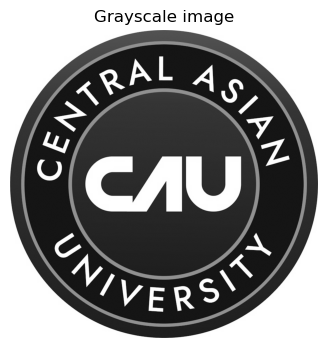

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(5,4))
plt.imshow(gray, cmap="gray")
plt.title("Grayscale image")
plt.axis("off")
plt.show()

## B1) Image Negative

## Image Negative (Intensity Inversion)

The image negative operation inverts pixel intensities so that dark areas become bright and bright areas become dark.

### Objective

The purpose of this transformation is to:

- Enhance details in dark regions
- Improve visual interpretation in some medical and scientific images
- Demonstrate a basic intensity transformation

---

### How the code works

1. The negative image is created using:

```python
negative = 255 - gray


2. For an **8-bit grayscale image**, intensity values range from **0 to 255**:

- `0` (black) becomes `255` (white)  
- `255` (white) becomes `0` (black)

3. The original and negative images are displayed side-by-side using subplots.

4. The result is saved using:

```python
cv2.imwrite("negative.jpg", negative)


### Mathematical idea

For each pixel intensity \( r \):

$$
s = 255 - r
$$

where:

- \( r \) = original pixel value  
- \( s \) = transformed pixel value

---

### Result

- Left image → Original grayscale image  
- Right image → Negative (intensity-inverted) image


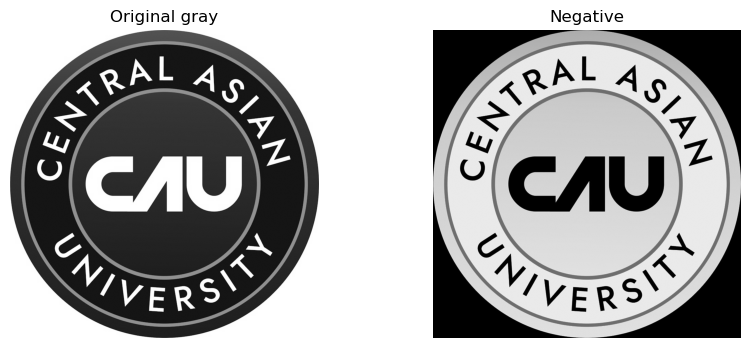

True

In [ ]:
negative = 255 - gray

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(negative, cmap='gray')
plt.title("Negative")
plt.axis("off")

plt.show()

# Save
cv2.imwrite("negative.jpg", negative)

## B2) Gamma Curves

## Gamma Transformation Curves

Gamma transformation (also called power-law transformation) is used to adjust image brightness by applying a nonlinear mapping to pixel intensities.

### Objective

The goal of this section is to visualize how different **gamma (\(\gamma\)) values** change intensity mapping.

---

### How the code works

1. A list of gamma values is defined:

```python
gammas = [0.02, 0.2, 0.5, 0.8, 1, 2, 3, 3.5, 4]


2. Input intensity values are generated between **0 and 1**:

```python
r = np.linspace(0,1,1000)


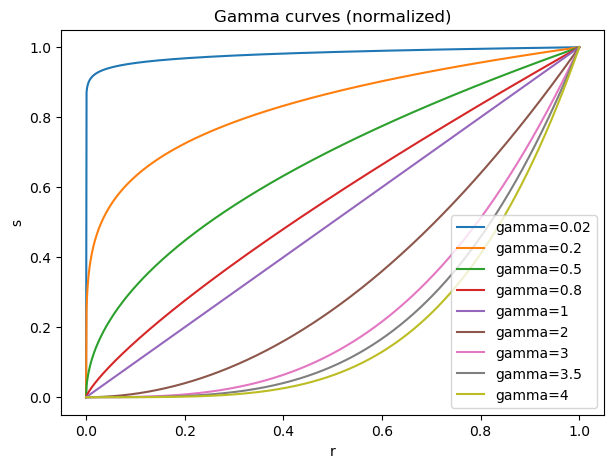

In [ ]:
gammas = [0.02, 0.2, 0.5, 0.8, 1, 2, 3, 3.5, 4]

r = np.linspace(0,1,1000)

plt.figure(figsize=(7,5))
for g in gammas:
    s = r**g
    plt.plot(r, s, label=f"gamma={g}")

plt.title("Gamma curves (normalized)")
plt.xlabel("r")
plt.ylabel("s")
plt.legend()
plt.show()

## B3) Gamma Correction on Image

## Gamma Correction (Image Enhancement)

Gamma correction is a nonlinear intensity transformation used to adjust image brightness.

### Objective

The purpose of this step is to enhance image appearance by applying a gamma transformation to the grayscale image.

---

### How the code works

1. A gamma value is selected:

```python
gamma = 0.7


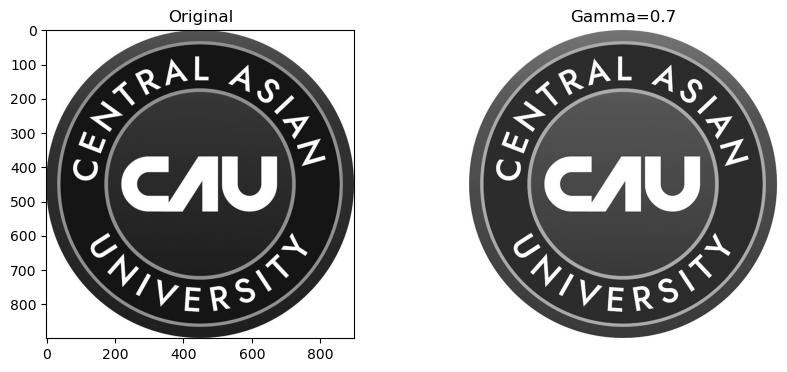

True

In [ ]:
gamma = 0.7

# Normalize to [0,1]
gray_norm = gray / 255.0

# Apply gamma
gamma_img = np.power(gray_norm, gamma)

# Back to uint8
gamma_img = np.uint8(gamma_img * 255)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(gamma_img, cmap='gray')
plt.title(f"Gamma={gamma}")

plt.axis("off")
plt.show()

cv2.imwrite("gamma_output.jpg", gamma_img)

## B4) Set intensity range [A,B] to white

## Intensity Range Mapping (Range Highlighting)

This section highlights a selected intensity range in a grayscale image by setting all pixel values within a chosen interval to white.

### Objective

The goal is to emphasize pixels whose intensities fall within a specific range \([A, B]\).  
This can be useful for:

- Highlighting structures with similar brightness
- Simple segmentation tasks
- Visual analysis of specific intensity regions

---

### How the code works

1. Define the intensity range:
   - `A = 80`
   - `B = 140`

2. Create a copy of the original grayscale image so the original data remains unchanged.

3. Create a **mask** using logical conditions:
   - Pixels with intensity between `A` and `B` are selected.

4. Set the selected pixels to **255 (white)**.

5. Display:
   - Original grayscale image
   - Processed image with highlighted range

6. Save the output image using `cv2.imwrite()`.

---

### Mathematical idea

For each pixel intensity \( I(x,y) \):

$$
I'(x,y) =
\begin{cases}
255, & \text{if } A \leq I(x,y) \leq B \\
I(x,y), & \text{otherwise}
\end{cases}
$$

---

### Explanation of key lines

- `mask = (range_img >= A) & (range_img <= B)`  
  Creates a boolean mask selecting pixels inside the range.

- `range_img[mask] = 255`  
  Assigns white intensity to all selected pixels.

---

### Result

- The left image shows the original grayscale image.
- The right image shows the selected intensity range highlighted in white.


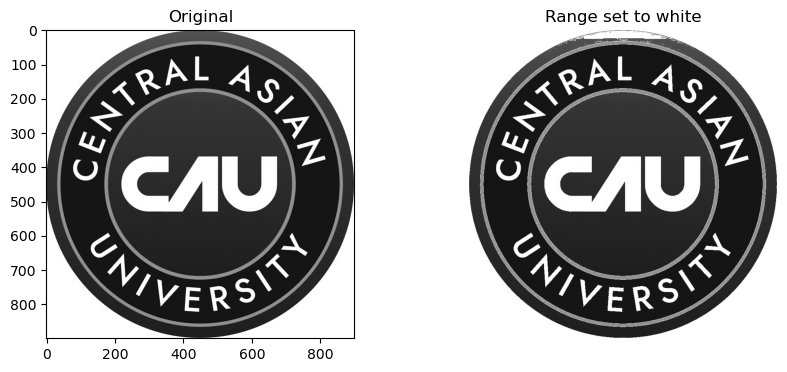

True

In [ ]:
A = 80
B = 140

range_img = gray.copy()

mask = (range_img >= A) & (range_img <= B)
range_img[mask] = 255

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(range_img, cmap='gray')
plt.title("Range set to white")

plt.axis("off")
plt.show()

cv2.imwrite("range_output.jpg", range_img)

---
# Part C — Bit‑Plane Slicing

## Bit-Plane Slicing (Bit-Plane Decomposition)

In an **8-bit grayscale image**, each pixel intensity is represented by **8 binary bits**:

- **Bit 0** → Least Significant Bit (LSB)  
- **Bit 7** → Most Significant Bit (MSB)

Bit-plane slicing separates an image into its individual binary layers (bit planes). This helps us understand how different bits contribute to image information:

- Lower bits (0–2) mostly contain fine details and noise.
- Middle bits contain moderate structural information.
- Higher bits (6–7) contain the main visual structure and brightness information.

---

### How the code works

1. A figure is created to display all bit planes.
2. The loop runs from bit `0` to `7`.
3. For each bit:
   - The image is shifted right by `k` positions.
   - A bitwise AND (`& 1`) extracts only that bit.
   - Values are multiplied by 255 so the result becomes visible as black (0) and white (255).
4. Each bit plane is shown as a subplot in a **2×4 grid**.
5. The final layout is adjusted using `tight_layout()`.

---

### Mathematical idea

For each pixel intensity \( I \):

$$
\text{BitPlane}_k = ((I >> k) \& 1)
$$

where:

- `>>` shifts bits to the right.
- `& 1` keeps only the selected bit.

---

### Applications

Bit-plane slicing is useful in:

- Image compression
- Digital watermarking
- Image enhancement analysis
- Understanding how image information is distributed across bits


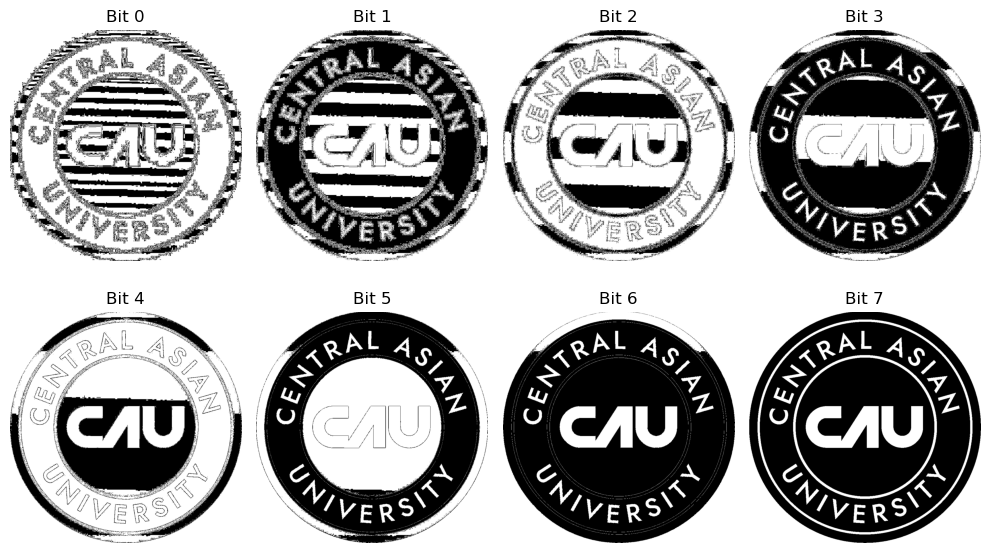

In [ ]:
plt.figure(figsize=(10,6))

for k in range(8):
    bit = ((gray >> k) & 1) * 255

    plt.subplot(2,4,k+1)
    plt.imshow(bit, cmap='gray')
    plt.title(f"Bit {k}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## End of Notebook

Replace `sample.jpg` with your own images and rerun cells.